In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'train.csv')

In [3]:
nums = ["Age","Annual_Premium","Vintage"]

In [4]:
df.shape

(381109, 12)

In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Dapat dilihat bahwa tidak ada missing value dalam dataset

Tambahkan subset

In [8]:
df.duplicated().sum()

0

Pada dataset ini tidak ada data duplikat yang ditemukan

In [9]:
from scipy import stats

z_scores = stats.zscore(df[nums])
outliers = (np.abs(z_scores) > 3)
print("Number of outliers:", outliers.sum())

Number of outliers: Age                  0
Annual_Premium    2083
Vintage              0
dtype: int64


- Setelah dilakukan pengecekan outlier dengan menggunakan Z-Score didapat bahwa kolom 'Age' dan 'Vintage' tidak memiliki outlier, sedangakan pada kolom 'Annual_Premium' terdapat outlier sebanyak 2083 data outlier.
- Untuk mengatasi outlier pada kolom 'Annual_Premium' akan dilakukan log transform

In [10]:
# handling outliers dengan log trasnform
df['data_log_transformed'] = np.log1p(df['Annual_Premium'])

# mengecek ouliers pada data log transform
z_scores = stats.zscore(df['data_log_transformed'])
outliers = (np.abs(z_scores) > 3)
print("Number of outliers:", outliers.sum())

Number of outliers: 10


Setelah dilakukan log transform pada kolom 'Annual_Premium' dan di cek menggunakan Z-Score data outliers berkurang secara signifikan dari 2083 data menjadi 10 data outliers. 

In [16]:
data_filtered = df[~outliers]
print("Jumlah baris sebelum memfilter outlier :", len(df))
print("Jumlah baris setelah memfilter outlier :", len(data_filtered))

Jumlah baris sebelum memfilter outlier : 381109
Jumlah baris setelah memfilter outlier : 381099


Untuk analisis selanjutnya dapat menggunakan data yang sudah difilter dari outlier

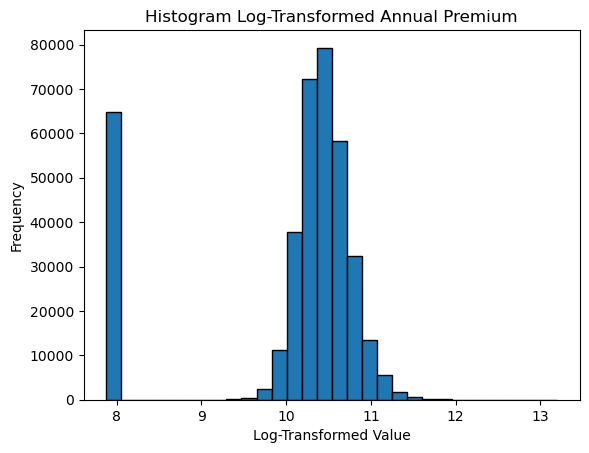

In [51]:
import matplotlib.pyplot as plt

plt.hist(data_log_transformed, bins=30, edgecolor='black')
plt.title('Histogram Log-Transformed Annual Premium')
plt.xlabel('Log-Transformed Value')
plt.ylabel('Frequency')
plt.show()

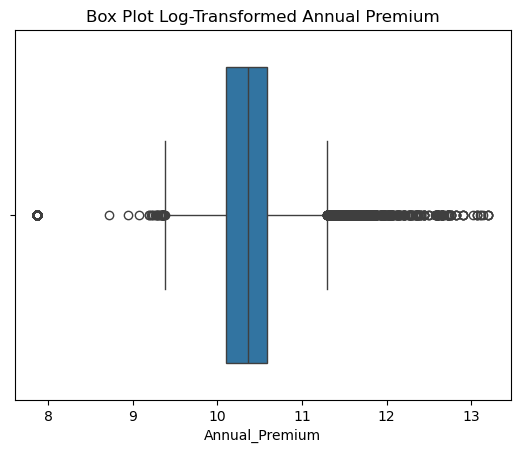

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data_log_transformed)
plt.title('Box Plot Log-Transformed Annual Premium')
plt.show()